# Preparation

In [22]:
import pandas as pd
from datetime import timedelta
import os

import sys
sys.path.append( '../../src/' )

from ml.preprocessing import *

In [23]:
path = [ '..', '..', 'datasets' ]
out_path = [ '..', '..', 'datasets', 'resolutions' ]

df = pd.read_csv( os.path.join( *path, 'ds-gym-1sec.csv' ) , parse_dates = [ 'date' ] ).drop( columns = [ 'alt' ] )

## Removing null values

In [24]:
print( 'Legnth: ', len( df ) )
print( 'Null values:' )
len( df ) - df.count()

Legnth:  10129
Null values:


date    0
pre     0
hum     4
tem     0
occ     0
dtype: int64

In [25]:
df = df.dropna( axis = 0, subset = [ 'occ', 'hum' ], thresh = 2 )

In [26]:
print( 'Legnth: ', len( df ) )
print( 'Null values:' )
len( df ) - df.count()

Legnth:  10125
Null values:


date    0
pre     0
hum     0
tem     0
occ     0
dtype: int64

In [27]:
# date format mm-dd-yyyy

temp = df[ ( df.date >= '2019-01-01' ) & ( df.date <= '2019-02' ) ][ 'date' ] + timedelta( days = 264 )
df.loc[ temp.index, 'date' ] = temp

## Genereting other resolutions

In [9]:
from sklearn.model_selection import train_test_split 
import os

path = [ '..', '..', 'datasets' ]
out_path = [ '..', '..', 'datasets', 'resolutions' ]

def split_and_save( df, out_path, resolution ):
    x_train, x_test, y_train , y_test = train_test_split( df[ df.columns[ :-1 ] ], df.occ, test_size = 0.20, random_state = 0 )
    x_train[ 'occ' ] = y_train
    x_test[ 'occ' ] = y_test
    x_train.to_csv( os.path.join( *out_path, 'ds-%s-train.csv' % ( resolution ) ) )
    x_test.to_csv( os.path.join( *out_path, 'ds-%s-test.csv'% ( resolution ) ) )
    
# adding seconds resolution to time index

df[ 'seconds' ] = df.groupby( pd.Grouper( key = 'date', freq = 'min' ) ).cumcount()
df[ 'date' ] = df.date + pd.to_timedelta( df.seconds, unit = 's' )
df = df.drop( columns = [ 'seconds' ] ).set_index( 'date' )

### 10 (sampled and averaged)

In [10]:
split_and_save( resample_df( df, '10S' ), out_path, 'gym-10sec' )
split_and_save( resample_df_avg( df, '10S' ).round( 2 ), out_path, 'gym-10sec-avg' )

### 30 seconds 

In [11]:
split_and_save( resample_df( df, '30S' ), out_path, 'gym-30sec' )
split_and_save( resample_df_avg( df, '30S' ).round( 2 ), out_path, 'gym-30sec-avg' )

### 1 minute (sampled and averaged)

In [12]:
split_and_save( resample_df( df, '1min' ), out_path, 'gym-1min' )
split_and_save( resample_df_avg( df, '1min' ).round( 2 ), out_path, 'gym-1min-avg' )

### 5 minutes (sampled and averaged)

In [13]:
split_and_save( resample_df( df, '5min' ), out_path, 'gym-5min' )
split_and_save( resample_df_avg( df, '5min' ).round( 2 ), out_path, 'gym-5min-avg' )

## Visualization

In [28]:
from ml.visualization import *

df[ 'seconds' ] = df.groupby( pd.Grouper( key = 'date', freq = 'min' ) ).cumcount()
df[ 'date' ] = df.date + pd.to_timedelta( df.seconds, unit = 's' )
df = df.drop( columns = [ 'seconds' ] ).set_index( 'date' )
df

,pre,hum,tem,occ
date,,,,
2019-09-18 19:04:00,95006.28,58.69,27.17,M
2019-09-18 19:04:01,95004.94,58.67,27.17,M
2019-09-18 19:04:02,95002.38,58.66,27.17,M
2019-09-18 19:04:03,95003.33,58.59,27.18,M
2019-09-18 19:04:04,95003.33,58.55,27.18,M
...,...,...,...,...
2019-09-24 16:17:05,94960.91,56.44,28.61,M
2019-09-24 16:17:06,94958.60,56.48,28.61,M
2019-09-24 16:17:07,94958.60,56.72,28.63,M


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10125 entries, 2019-09-18 19:04:00 to 2019-09-24 16:17:09
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pre     10125 non-null  float64
 1   hum     10125 non-null  float64
 2   tem     10125 non-null  float64
 3   occ     10125 non-null  object 
dtypes: float64(3), object(1)
memory usage: 395.5+ KB


In [46]:
df.resample( 'min' ).first().dropna( how = 'any' )

,pre,hum,tem,occ
date,,,,
2019-09-18 19:04:00,95006.28,58.69,27.17,M
2019-09-18 19:05:00,95007.00,59.27,27.05,M
2019-09-18 19:06:00,95002.70,59.17,27.03,M
2019-09-18 19:07:00,95006.38,57.94,26.93,M
2019-09-18 19:08:00,95006.38,58.23,26.93,M
...,...,...,...,...
2019-10-02 20:44:00,95196.10,59.51,27.27,L
2019-10-02 20:45:00,95202.30,59.44,27.23,L
2019-10-02 20:46:00,95197.02,59.12,27.25,L


### Complete dataset

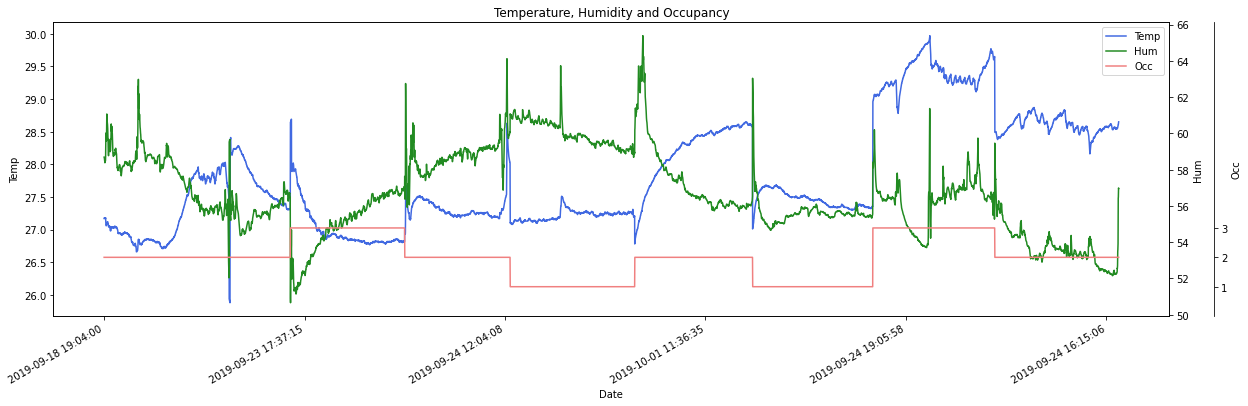

CPU times: user 4.64 s, sys: 69.9 ms, total: 4.71 s
Wall time: 4.75 s


In [48]:
%%time
plot_env_vars( df.index.astype( str ), df[ 'tem' ], df[ 'hum' ], df[ 'occ' ] )

# plot_single( df.index.astype( str ), df[ 'tem' ], 'Temperature' )
# plot_single( df.index.astype( str ), df[ 'hum' ], 'Humidity' )
# plot_single( df.index.astype( str ), df[ 'pre' ], 'Pressure' )

### By day

In [51]:
df_temp = df.resample( 'D' ).agg( { 'pre': 'mean', 'hum': 'mean', 'tem': 'mean' } ).dropna( how = 'any' )
df_temp

,pre,hum,tem
date,,,
2019-09-18,95008.452204,57.736490,27.221811
2019-09-23,95306.477768,55.216022,27.252038
2019-09-24,95070.892275,56.127901,28.490613
2019-09-25,95239.831184,55.598449,27.456422
2019-10-01,95361.285578,57.533138,28.210349
2019-10-02,95186.726685,60.022156,27.216251


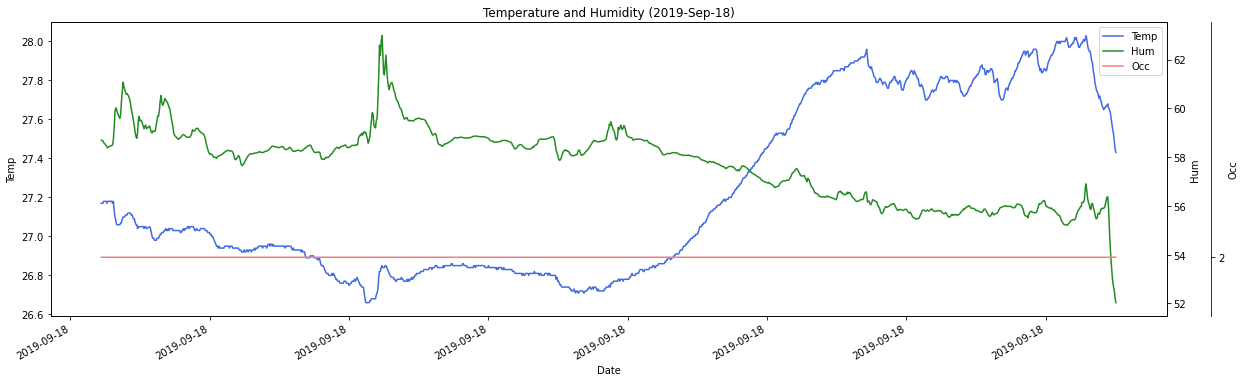

Total: 1248
Counter({'M': 1248})


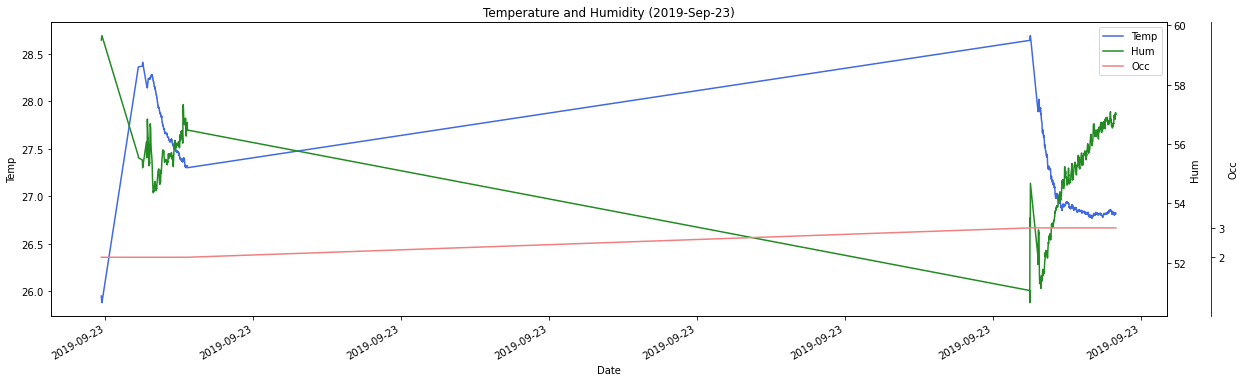

Total: 1752
Counter({'H': 1141, 'M': 611})


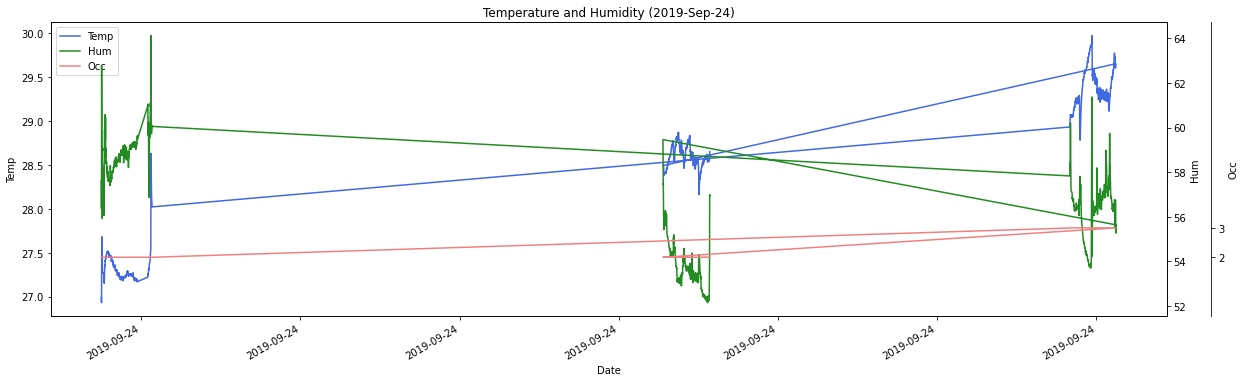

Total: 3507
Counter({'M': 2290, 'H': 1217})


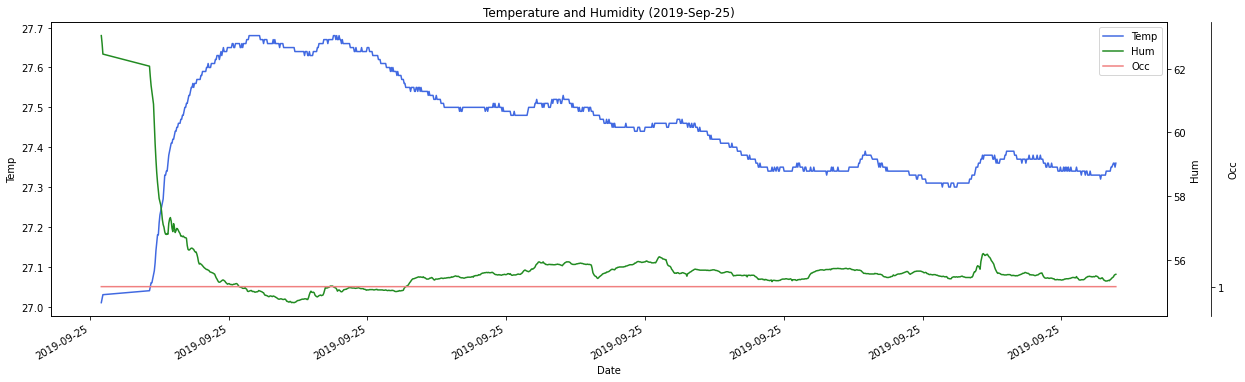

Total: 1199
Counter({'L': 1199})


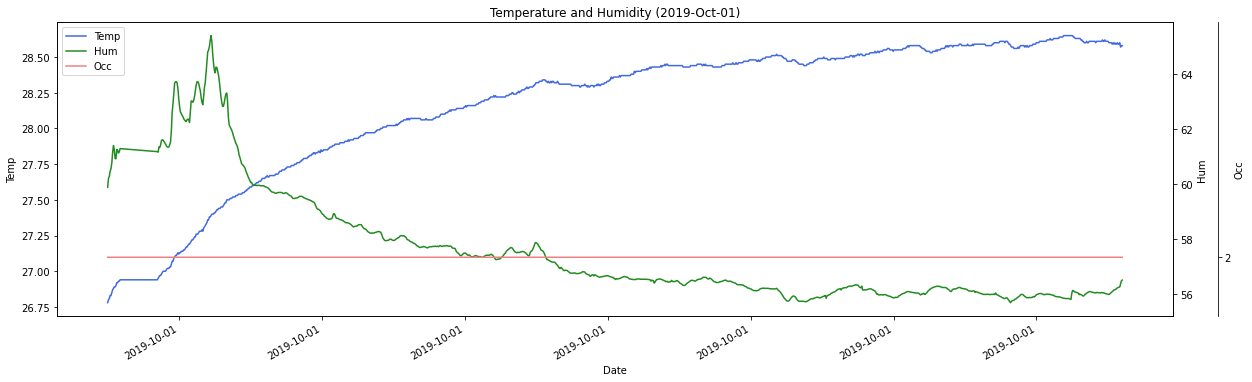

Total: 1176
Counter({'M': 1176})


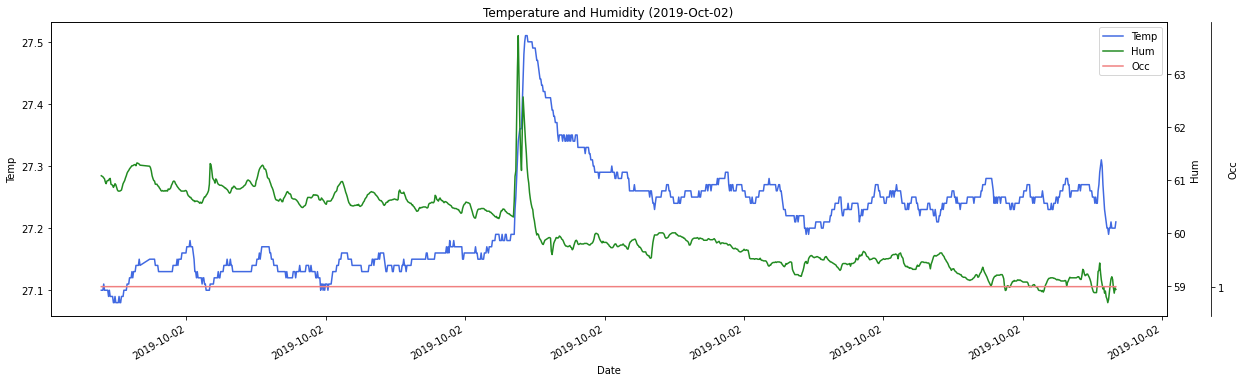

Total: 1243
Counter({'L': 1243})


In [52]:
from collections import Counter

df_temp = df.groupby( df.index.floor( 'D' ) ) 
for i, g in df_temp:
    plot_env_vars( 
        g.index, 
        g[ 'tem' ], 
        g[ 'hum' ], 
        g[ 'occ' ],
        "Temperature and Humidity (" + g.index[ 0 ].strftime( '%Y-%b-%d' ) + ")" )
    
    print( 'Total:', len( g ) )
    print( Counter( g.occ ) )